In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


import sys
sys.path.insert(0, "/home/estengel/ambiguous_parsing/src/")
from ambiguous_parsing.eval.eval import get_df

In [3]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = []
for model in ["350M", "2B", "6B", "16B"]:
    fol_models_and_paths.extend([("pp", f"codegen-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", f"codegen-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", f"codegen-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", f"codegen-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", f"codegen-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
    ])

# for model in ['7B', '30B']:
for model in ['13B']:
    fol_models_and_paths.extend([("pp", f"llama-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", f"llama-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", f"llama-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", f"llama-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", f"llama-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
    ])

for model in ['13B']:
    fol_models_and_paths.extend([("pp", f"vicuna-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", f"vicuna-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", f"vicuna-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", f"vicuna-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", f"vicuna-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
    ])

for model in ["gpt-3.5-turbo"]:
    fol_models_and_paths.extend([("pp", f"{model}_lamp_no_context_all_pp_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("scope", f"{model}_lamp_no_context_all_scope_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("revscope", f"{model}_lamp_no_context_all_revscope_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("bound", f"{model}_lamp_no_context_all_bound_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("conj", f"{model}_lamp_no_context_all_conj_fol_0_test_eval_unconstrained-api_bs_5_np_full")
    ])


In [4]:
big_df = []
for amb_type, path in fol_models_and_paths:
    fol_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test.jsonl"
    fol_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test_eval.jsonl"
    pred_path = CHECKPOINT_DIR / path
    try:
        model = path.split("_")[0]
        print(model, amb_type)
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        df['model'] = model
        df['amb_type'] =  amb_type
        # df['model_order'] = model_order.index(model_name)
        df['is_fol'] = True
        big_df.append(df)
    except (FileNotFoundError, IndexError, AssertionError) as e:
        print(f"Skipping {amb_type}")
        continue

big_df = pd.concat(big_df)

codegen-350M pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M scope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M revscope
6 = 3.00 are missing a first output
7 = 3.50 are missing a second output
codegen-350M bound
1 = 0.50 are missing a first output
1 = 0.50 are missing a second output
codegen-350M conj
0 = 0.00 are missing a first output
5 = 2.50 are missing a second output
codegen-2B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B scope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B revscope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B bound
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B conj
112 = 56.00 are missing a first output
119 = 59.50 are missing a second output
codegen-6B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output

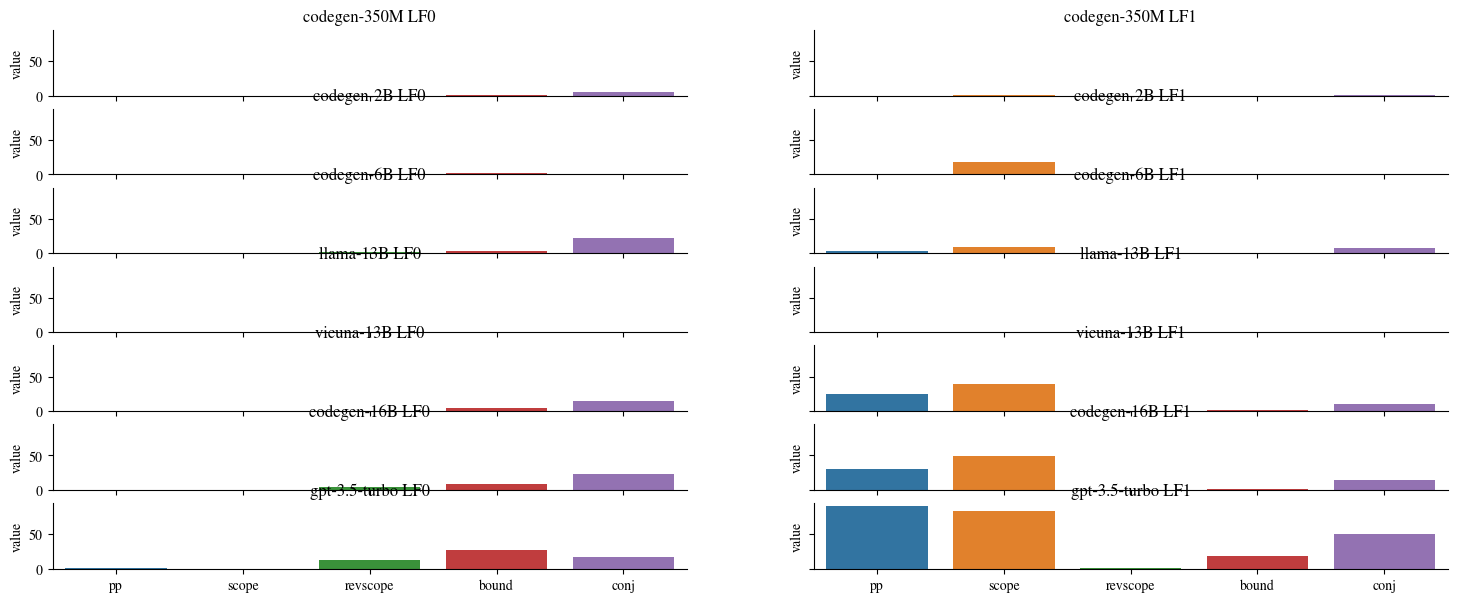

In [10]:


fig, ax = plt.subplots(7, 2, figsize = (18, 7), sharex=True, sharey=True)

for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "llama-13B", "vicuna-13B", "codegen-16B", "gpt-3.5-turbo"]):
    local_df = big_df[big_df['model'] == model]
    lf1_df = local_df[local_df['key'] == "pred_top_1_matches_lf_0"]
    lf2_df = local_df[local_df['key'] == "pred_top_1_matches_lf_1"]
    sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
    sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_title(f"{model} LF0")
    ax[i,1].set_title(f"{model} LF1")

sns.despine()

In [6]:
# fig, ax = plt.subplots(5, 2, figsize = (14, 5), sharex=True, sharey=True)

# for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "codegen-16B", "llama-7B"]):
#     local_df = big_df[big_df['model'] == model]
#     lf1_df = local_df[local_df['key'] == "lf_0_in_top_k"]
#     lf2_df = local_df[local_df['key'] == "lf_1_in_top_k"]
#     sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
#     sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
#     ax[i,0].set_xlabel("")
#     ax[i,1].set_xlabel("")
#     ax[i,0].set_title(f"{model} LF0")
#     ax[i,1].set_title(f"{model} LF1")

# sns.despine()

/tmp/ipykernel_114385/4002158390.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf1_df['model_key'] = lf1_df['model'].apply(lambda x: get_size(x))
/tmp/ipykernel_114385/4002158390.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf2_df['model_key'] = lf2_df['model'].apply(lambda x: get_size(x))
/tmp/ipykernel_114385/4002158390.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['cg-350M', 'cg-2B', 'cg-6B',  "ll-13B", "vi-13B", 'cg-16B', "gpt-3

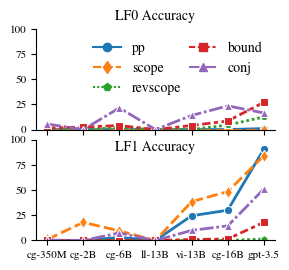

In [23]:
import re
from colors import colors, markers 

plt.rcParams["font.family"] = "Nimbus Roman"

fig, ax = plt.subplots(2, 1, figsize = (3, 2.8), sharex=True, sharey=True)

local_df = big_df
lf1_df = local_df[local_df['key'] == "pred_top_1_matches_lf_0"]
lf2_df = local_df[local_df['key'] == "pred_top_1_matches_lf_1"]
# split model on -

def get_size(key):
    lut = {"text-ada-001": "2.5B", "gpt-3.5-turbo": "100B"}
    if key in lut.keys():
        num = lut[key]
    else:
        num = key.split("-")[1]
    if "M" in num:
        num = float(re.sub("M", "", num)) / 100
    else:
        num = float(re.sub("B", "", num)) * 10
    return num

lf1_df['model_key'] = lf1_df['model'].apply(lambda x: get_size(x))
lf2_df['model_key'] = lf2_df['model'].apply(lambda x: get_size(x))
# sort by model key
lf1_df = lf1_df.sort_values(by=['model_key', "model"])
lf2_df = lf2_df.sort_values(by=['model_key', "model"])
# convert to str 
lf1_df['model_key'] = lf1_df['model_key'].apply(lambda x: str(x))
lf2_df['model_key'] = lf2_df['model_key'].apply(lambda x: str(x))
sns.lineplot(data = lf1_df, 
            x = "model", 
            y = "value", 
            hue='amb_type', 
            style='amb_type', 
            markers = markers, 
            palette=colors,
            linewidth=2,
            ax = ax[0]) 
sns.lineplot(data = lf2_df, 
             x = "model", 
             y = "value", 
             hue='amb_type', 
             style='amb_type', 
             markers = markers, 
             palette=colors,
             linewidth=2,
             ax = ax[1])
# 
ax[0].set_xticklabels(['cg-350M', 'cg-2B', 'cg-6B',  "ll-13B", "vi-13B", 'cg-16B', "gpt-3.5"]) # 



ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_title(f"LF0 Accuracy", fontsize=10)
ax[1].set_title(f"LF1 Accuracy", fontsize=10, y=0.8)


# rotate ticks
for tick in ax[0].get_xticklabels():
    # tick.set_rotation(45)
    tick.set_fontsize(8)
for tick in ax[1].get_xticklabels():
    # tick.set_rotation(45)
    tick.set_fontsize(8)

ax[1].legend().remove()
legend = ax[0].legend(frameon=False, ncol=2, columnspacing=0.5, fontsize=10)
ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 25, 50, 75, 100])
ax[0].set_yticklabels([0, 25, 50, 75, 100], fontsize=8)
ax[1].set_yticklabels([0, 25, 50, 75, 100], fontsize=8)
ax[0].set_ylabel("")
ax[1].set_ylabel("")

sns.despine()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)


plt.savefig("/home/estengel/papers/ambiguous-parsing-2023/figures/zero_shot_acc.pdf")

In [5]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 

amb_type = "scope"
fol_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test.jsonl"
fol_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test_eval.jsonl"
fol_path = "codegen-2B_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"
fol_pred_path = CHECKPOINT_DIR / fol_path

fol_df = get_df(fol_test_path, fol_eval_path, fol_pred_path, is_fol=True)
print(fol_df)

lisp_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_lisp/test.jsonl"
lisp_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_lisp/test_eval.jsonl"
lisp_path = "codegen-2B_lamp_no_context_all_scope_lisp_0_test_eval_constrained_bs_5_np_full"
lisp_pred_path = CHECKPOINT_DIR / lisp_path

lisp_df = get_df(lisp_test_path, lisp_eval_path, lisp_pred_path, is_fol=False)
print(lisp_df)

0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
     type                        key  value
0   scope    pred_top_1_matches_lf_0    0.0
1   scope    pred_top_2_matches_lf_0    0.0
2   scope    pred_top_1_matches_lf_1   18.0
3   scope    pred_top_2_matches_lf_1   37.0
4   scope  pred_top_1_matches_either   18.0
5   scope              lf_0_in_top_2    0.0
6   scope              lf_1_in_top_2   55.0
7   scope              lf_0_in_top_3    0.0
8   scope              lf_1_in_top_3   73.0
9   scope              lf_0_in_top_4    0.0
10  scope              lf_1_in_top_4   75.0
11  scope                      total  200.0


AssertionError: 